In [6]:
%matplotlib inline
import rasterio as rio
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

sys.path.append(os.path.join(os.path.abspath(''), "../"))
from src import get_affine

In [7]:
data_root = os.path.join("..","data", "los_angeles", "*")
flist = glob.glob(data_root)
len(flist)

10

In [8]:
img = flist[0]
with rio.open(img) as src:
    profile = src.profile
    VV_0 = src.read(1)

img = flist[-1]
with rio.open(img) as src:
    profile = src.profile
    VV_1 = src.read(1)

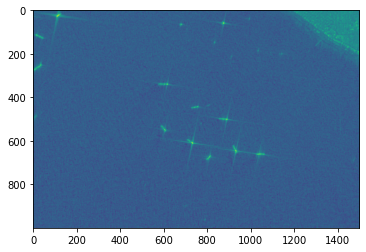

In [9]:
plt.imshow(VV_0[1000:2000, 2000:3500])

In [16]:
thresh = 15
removed = np.where(VV_1 - VV_0 < -thresh, 1, 0)
constructed = np.where(VV_1 - VV_0 > thresh, 1, 0)

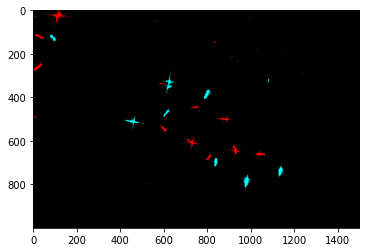

In [17]:
VV = np.array([removed, constructed, constructed])*255
VV = VV[:, 1000:2000, 2000:3500]
plt.imshow(VV.transpose(1, 2, 0))

In [24]:
affine = get_affine(img, [1000, 2000], [2000, 3500])
affine

Affine(8.983152841195382e-05, 0.0, 67.08524218699753,
       0.0, -8.983152841195264e-05, 24.88283929670448)

In [25]:
save_img_name = "../output/output.tif"

with rio.open(
    save_img_name,
    "w",
    driver="GTiff",
    dtype=VV.dtype,
    height=1000,
    width=1500,
    count=3,
    crs=src.crs,
    transform=affine,
) as dst:

    dst.write(VV)